In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2: Load original dataset
df = pd.read_csv('../data/BostonHousing.csv')

In [ ]:
# Step 3: Feature Engineering
# creating interaction and polynomial features
df['rm_lstat'] = df['rm'] * df['lstat']
df['dis_squared'] = df['dis'] ** 2
df['age_bin'] = pd.cut(df['age'], bins=[0, 35, 70, 100], labels=[0, 1, 2])  # binning

In [4]:
# converting binned feature to numeric
df['age_bin'] = df['age_bin'].astype(int)

In [5]:
# Step 4: Cap outliers, paila kai logic
def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower, lower, df[col])
        df[col] = np.where(df[col] > upper, upper, df[col])
    return df

In [7]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols.remove('chas')  # dummy exclude
df = cap_outliers(df, numeric_cols)

In [8]:
# Step 5: Prepare features and target
X = df.drop('medv', axis=1)
y = df['medv']

In [9]:
# Step 6: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Step 7: Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [11]:
# Step 8: Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Step 9: Evaluate model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [13]:
print("With Feature Engineering:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

With Feature Engineering:
RMSE: 2.95
R² Score: 0.82


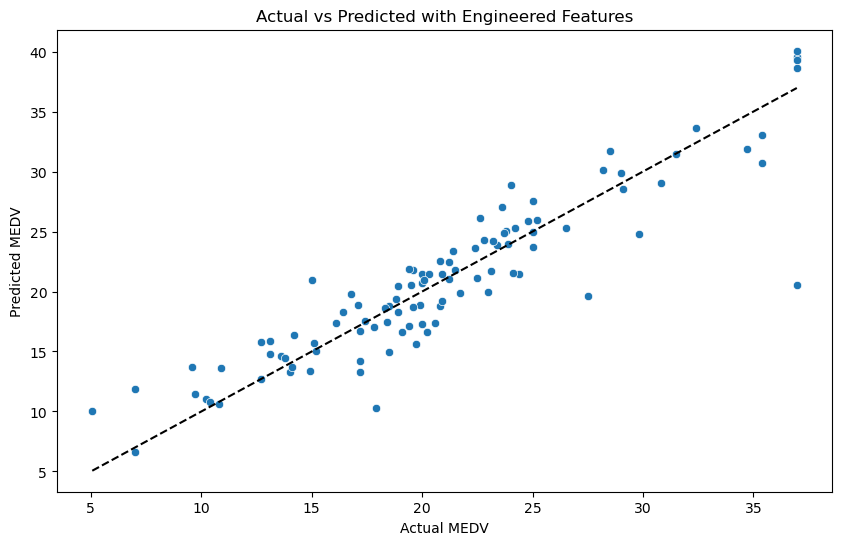

In [14]:
# Step 10: Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted with Engineered Features")
plt.show()

definitely better rmse and r^2 score than the model without feature engineering
without fe :rmse -> 3.47, r^2 score -> 0.75
with fe:rmse -> 2.95, r^2 score -> 0.82